<a href="https://colab.research.google.com/github/popthart/Machine-learning/blob/cs-homework/CSHW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install requests

import requests

target_url ='http://www.gutenberg.org/files/2265/2265.txt'

response = requests.get(target_url)

data = response.text

In [3]:
!pip install textblob
import textblob
from textblob import TextBlob

In [4]:
blob = TextBlob(data)

In [5]:
import imageio

image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"

mask_image = imageio.imread(image_file)

<ipython-input-5-d8df5f5f3802>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(image_file)


In [6]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords

In [8]:
stop_words = stopwords.words('english')

In [9]:
items = blob.word_counts.items()

In [10]:
items = [item for item in items if item[0] not in stop_words]

In [11]:
from operator import itemgetter
sorted_items = sorted(items, key = itemgetter(1), reverse=True)

In [12]:
Top20Words = sorted_items[1:21]

In [13]:
import pandas as pd
df = pd.DataFrame(Top20Words, columns = ['word', 'count'])
df = df.set_index(pd.RangeIndex(start=1, stop=len(df)+1, step=1))
df

,word,count
1,lord,211
2,haue,175
3,king,173
4,shall,107
5,hamlet,106
6,come,106
7,thou,105
8,let,104
9,good,99
10,hor,95


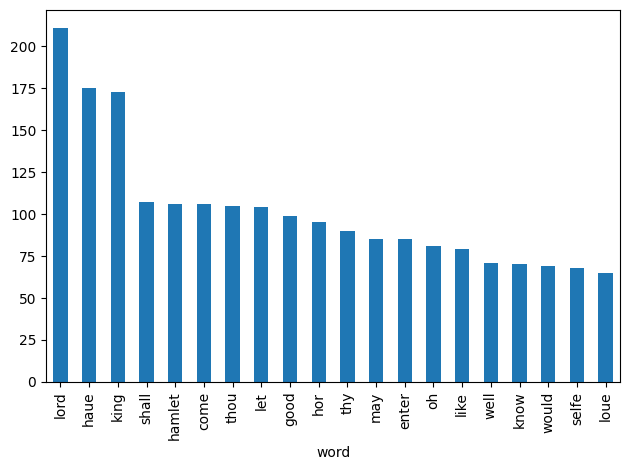

In [14]:
axes = df.plot.bar(x='word', y='count', legend=False)
import matplotlib.pyplot as plt
plt.gcf().tight_layout()

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=1000,
    colormap='prism', mask=mask_image, background_color='white')

In [16]:
wordcloud = wordcloud.generate(data)
wordcloud = wordcloud.to_file('Hamlet.png')

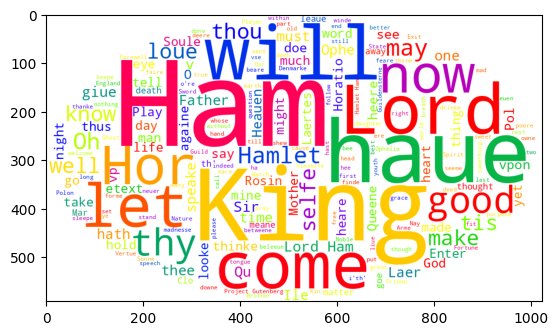

In [18]:
plt.imshow(wordcloud)